<h1><center>CMPE 462 - Project 3 <br>Implementing K-Means & PCA<br>Due: June 14, 2020, 23:59</center></h1>

### **FISH AND FISHERS**
* **Student1: 2016400186**
* **Student2: 2016400078**
* **Student3: 2016400003**

In this project, you are going to implement two unsupervised learning techniques. In the first task, you are asked to implement **k-means clustering** algorithm using the data provided in `kmeans_data.zip`. In the second task, you need to implement **PCA** and apply dimensionality reduction on the data provided in `USPS.mat`. 

# (50 pts) Task 1: K-Means Clustering

Please download `kmeans_data.zip`. In this problem, ground truth cluster assignments are given in `labels.npy`. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

labels = np.load("./kmeans_data/label.npy")
data = np.load("./kmeans_data/data.npy")

## (10 pts) Task 1.1: Plot Clusters

Plot the data using scatter plot. Assign different colors to different classes.

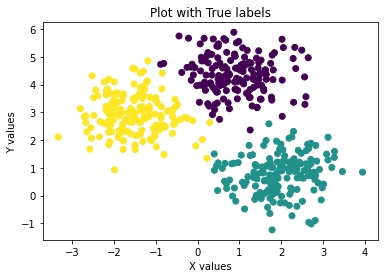

In [5]:
plt.scatter(data[:,0], data[:,1], c=labels)    # scattering with true labels
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Plot with True labels")
plt.show()

## (30 pts) Task 1.2: K-Means Implementation

Implement k-means clustering algorithm by yourself using the number of iterations as the stopping condition. You can use built-in functions only for side-tasks such as norm computation, minimum element search and mean calculation, not for the clustering itself.

In [7]:
def kmeans(data, k, iteration):
    np.random.seed(1)            # seed with 1
    centroids =  [data[i] for i in np.random.choice(500, k, replace=False)]    # random centroids
    for loop in range(iteration):
        m = np.zeros((len(data), k))                           # m matrix init with zeros
        for i in range(len(data)):
            norms = []
            for j in range(k):
                norms.append(np.linalg.norm(data[i] - centroids[j]))               # calcualatin distance
            m[i][np.argmin(norms)] = 1                                         # setting closest centroid as 1
        centroids = np.array([np.sum(m[:,i].reshape((len(data),1)) * data, axis=0)/np.sum(m[:,i]) for i in range(k)]) # update centroids
    return centroids

## (10 pts) Taks 1.3: Evaluation

Run k-means $9$ times with number of iterations $(N)$ $= \{1, 2, ..., 9\}$. Plot the final clustering assignments as a scatter plot for each run as 3x3 `matplotlib subplot`. Visually investigate the effect of the number of iterations on obtaining the optimal clustering and find the convergence point by comparing the plots with the one in Task 1.1. If the model does not converge at $9$ iterations, you can select $9$ other $N$ to effectively show the progress of the clustering.

For a fair comparison, start each run with the same initial random assignments. You can use `np.random.seed(1)` to this purpose.

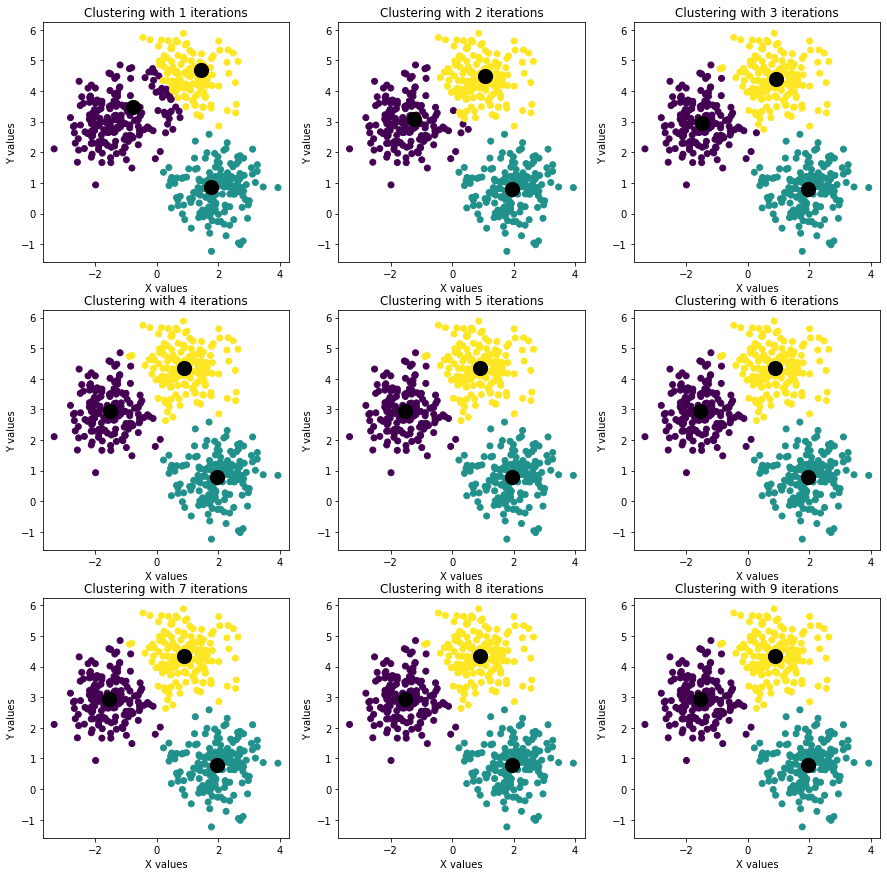

In [9]:
def classify(centroids, data):
    return [np.argmin([np.linalg.norm(x - centroids[j]) for j in range(len(centroids))]) for x in data]  #classification with last centroids

plt.figure(figsize = (15,15))
for i in range(1,10):
    cent = kmeans(data, 3, i)       # kmeans with i iteration
    plt.subplot(3,3,i)
    y = classify(cent, data)
    plt.scatter(data[:,0], data[:,1], c = y)                   # clusters
    plt.scatter(cent[:,0], cent[:,1], c = "black", s=200)      # centroid itself
    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.title("Clustering with {} iterations".format(i))
plt.show()

# (50 pts) Task 2: Principal Component Analysis (PCA)

Please load the whole dataset in `USPS.mat` using the function `loadmat` in `Scipy.io`. The matrix $A$ contains all the images of size 16 by 16. Each of the 3000 rows in $A$ corresponds to the image of one handwritten digit (between 0 and 9).

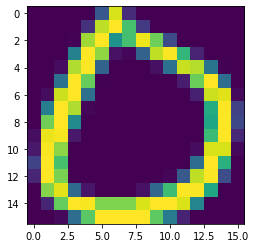

In [10]:
from scipy.io import loadmat
USPS = loadmat("USPS.mat")
data = USPS.get("A")
labels = USPS.get("L")

plt.imshow(data[0].reshape((16,16)))        # a image to see a default shape

## (30 pts) Task 2.1: PCA Implementation

Implement PCA and apply it to the data using $d = 50, 100, 200, 300$ principal components. You are not allowed to use an existing implementation. You can use existing packages for eigen-decomposition. **Do not forget to standardize the data before eigen-decomposition.**

In [11]:
def pca(data):
    feature_n = len(data[0])           # getting the length of features
    normalized_data = (data - np.mean(data, axis=0))/np.std(data, axis=0)       # normalizing data with zero mean and one variance
    covariance_matrix = (normalized_data.T @ normalized_data)/feature_n  #calculating covariance matrix
    
    return np.linalg.eigh(covariance_matrix)[1]     # since it is symmetric we calculate and return sorted eigenvectors
 
def getNPc(matrix, n):
    if n > np.shape(matrix)[1]:           
        n = 0
    return matrix[:,-n:]               # getting n most valued eigenvector
    
vals = [50,100,200,300]           # pc number list
covariance_matrix_list = [getNPc(pca(data), i) for i in vals]

## (15 pts) Task 2.2: Image Reconstruction

Reconstruct images using the selected principal components from Task 2.1

In [12]:
def getReconstuctedData(data, g):
    return g @ ( g.T @ data.T)            # reconstruction from given vector and original data matrix

r_data = [getReconstuctedData(data, covariance_matrix) for covariance_matrix in covariance_matrix_list]
r_data.append(data.T)

## (5 pts) Task 2.3: Evaluation

Visualize the reconstructed images for the images at indices $i = 0, 500, 1000, 2000$ for $d=50, 100, 200, 300$. Create a 4x5 subplot where the rows correspond to images at each index, first four columns correspond to reconstructed images using each $d$ and the last column is the raw image, i.e. before PCA. Comment on your results.

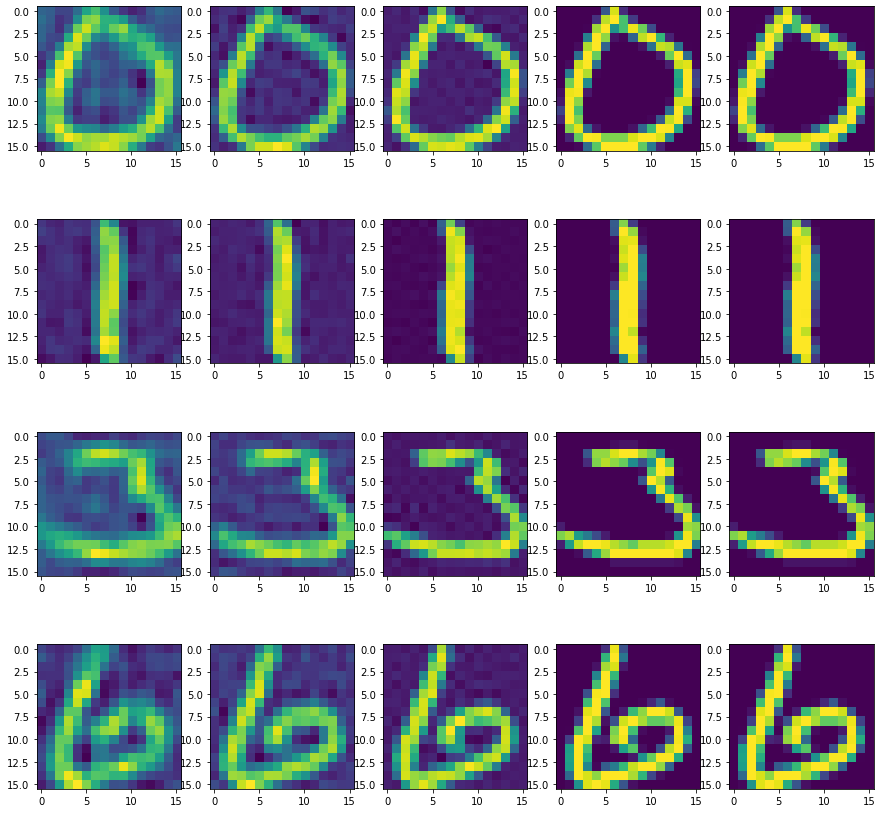

In [13]:
def plot(data, target, height, width, fig_h, fig_w, im_h, im_w):
    plt.figure(figsize = (fig_h,fig_w))
    for row in range(len(target)):
        for col in range(width):
            plt.subplot(height , width , row*width + col+1)       # plotting on a specific location of mainplot
            plt.imshow(data[col][:,target[row]].reshape((im_h,im_w)))   # showing image of subplot
    plt.show()

target = [0,500,1000,2000]              # target values
plot(r_data,target, 4, 5, 15,15,16,16)  # function call

**Comments:**
* Getting first 50 principal components gave us most of the information about image. We can see and distinguish the number by looking at it because the most varianced feature covers the most information about image. 
* We can see that 200 and 256 are not so different from each other which also shows that variance is small among the lowest values eigenvectors. 
* By calculating principal components we can reduce the dimensionality of our data from 256 to 50 which is great.